# Methoden en Technieken -- Blok 1b

## Datapunt Opdracht
In deze opdracht worden de volgende leeruitkomsten getoetst, relevante termen zijn **dik** gedrukt:
- A2: Je stelt voor een AI-oplossing juridische, ethische, organisatorische, **functionele en
technische requirements** op.
- B1: Je **verkent en prepareert een dataset voor het trainen en testen van een AI-model** en
kan de voor- en nadelen van het gebruik van een bestaande dataset onderbouwen, rekening
houdend met technische en ethische randvoorwaarden.
- B2: Je **stelt op basis van requirements en data een geschikte architectuur voor een AI-
oplossing op en selecteert daarvoor passende AI-technieken gebruik makend van bijvoorbeeld
machine learning, deep learning**, kennisrepresentatie, computer vision en natural language
processing.
- B3: Je **ontwikkelt een nieuw** of voorgetraind **AI-model** volgens een iteratief en systematisch
proces.
- C2: **Je evalueert en beoordeelt de kwaliteit van een AI-model aan de hand van kwaliteitscriteria die in het vakgebied erkend worden** zoals robustness, **performance**, scalability,
**explainability**, **model complexity** en resource demand.

Dit is een individuele opdracht. Het is toegestaan met elkaar de opdracht te bespreken, maar iedereen schrijft zijn eigen code en antwoorden. Mocht je code van het internet hebben overgenomen/aangepast, vermeld dan de bron in het commentaar. Het gebruik van generatieve AI (Chat-GPT, etc...) is *alleen* toegestaan bij de voorbereiding op de opdracht. Denk hierbj aan activiteiten zoals brainstormen, of het maken van een plan. Het is niet toegestaan code of tekst van generative AI over te nemen. (Level 2 van de AI Assessment Scale)


In [4]:
import os

os.environ["KERAS_BACKEND"] = "torch"

import keras
import numpy as np
import matplotlib.pyplot as plt

## Data

In deze opdracht werken we met gesimuleerde data, deze wordt hier aangemaakt. We gaan hier wel van uit dat dit de volledige data is, het is niet toegestaan extra trekkingen te doen.

In [5]:
# Verband tussen x en y
def f(x):
    return (+ 1.5*np.tanh(20*x - 6)  
            - 2.0*np.tanh(10*x - 4)
            + 1.5*np.tanh( 8*x - 4)
            - 1.0*np.tanh(15*x - 12))


In [6]:
# Trek data
np.random.seed(42)
xdat = np.random.uniform(0,1, size=1000).reshape(-1,1)
ydat = f(xdat) + np.random.normal(scale = 0.2, size = 1000).reshape(-1,1)

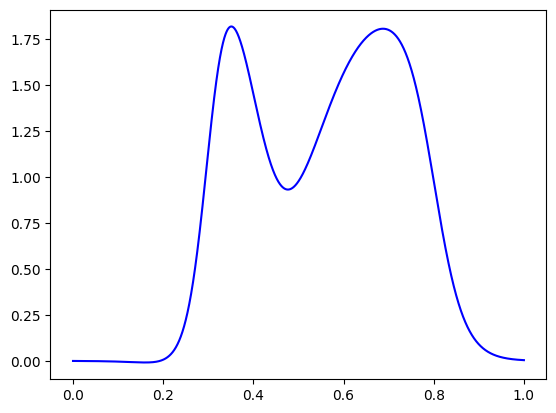

In [7]:
# Plot echt verband
xplot = np.linspace(0,1,10001)
yplot = f(xplot)
plt.plot(xplot, yplot, 'b-')
plt.show()

In deze opdracht is het de bedoeling om middels een neuraal netwerk de data $(xdat,ydat)$ die hierboven werdt gegeven te benaderen. Het uiteindelijke model behoort,
* de data / de functie $f$ zo goed mogelijk te benaderen, en
* zo simpel mogelijk te zijn (interpreteerbaarheid van model).

Tip: Lees eerst alle deelvragen goed door voordat je begint met beantwoorden.

# Voordat je leest
- antwoorden staan onder de codeblocks, in de antwoorden refereer ik terug naar de codeblocks
- Ik heb een deel 7 geschreven waarin ik beredeneer wat een goede learning rate is, ik heb dit niet in deel 3 gedaan omdat ik dan veel moet herschrijven.
- om te oefenen met de stof heb ik samen met chatgpt, internet en youtube opdrachten voor mezelf gemaakt om te oefenen met dit concept omdat ik eerst geen idee had waar dit allemaal over ging. Deze opdrachten heb ik ook ingeleverd, ik verwacht niet op deze opdrachten beoordeeld te worden, maar zie het meer als een bewijs waar al mijn kennis ineens vandaan komt. Ik verwijs in een van mijn antwoorden ook naar een van de notebooks.
- als iets niet voldoende beredeneerd is in deze opdracht dan vraag ik me oprecht af: "Hoe verwachten jullie dat ik deze beredenering aantoon?", "Wanneer is het wel een goede beredenering?"

## Deel 1 

Bestudeer de definitie van $f$ en de grafiek van deze functie.

Hoe zou een zo simpel mogelijk neuraal netwerk voor dit probleem er uit zou zien. Bijvoorbeeld: hoeveel nodes/neuronen zou het moeten hebben? Hoeveel gewichten? Welke activatiefunctie(s)? Wees zo specifiek mogelijk.

> Jouw antwoord hier

Ik heb lineare en non-lineare activatie functies uitgeprobeerd in de oefenopdrachten die ik ook heb ingeleverd (Oefenopdracht 3), en uit de oefenopdrachten heb ik kunnen concluderen dat ik per S curve in de data een neuron nodig heb. De gegeven verband bevat 4 S-krommen. Dat betekent dat ik dus maar 4 neuronen nodig heb om een soort gelijke functie te fitten met mijn model, MITS ik een activatiefunctie gebruik die s-krommen kan genereren. In de M&T lessen hebben we geleerd dat een tanh of een sigmoid activatiefunctie s-krommen kan genereren.

Ik heb geconcludeerd dat ik 4 neuronen nodig heb om deze functie na te bootsen. Aangezien we 1 input hebben, 4 neuronen en 1 output. Dan betekent dat dat we tussen de input en de 4 neuronen 4 weights hebben en tussen de 4 neuronen en output ook 4 weights hebben dus in totaal heb ik dan 8 weights. Als activatiefunctie ga ik een tanh en een sigmoid activatiefunctie proberen. Als metric ben ik van plan MAE te gebruiken omdat er ruis aanwezig is, aangezien MAE beter presteert dan MSE als er ruis is.

## Deel 2 

Voer hier eventuele datapreparatie uit die nodig is voordat je een model gaat trainen. Licht gemaakte keuzes kort en bondig toe.

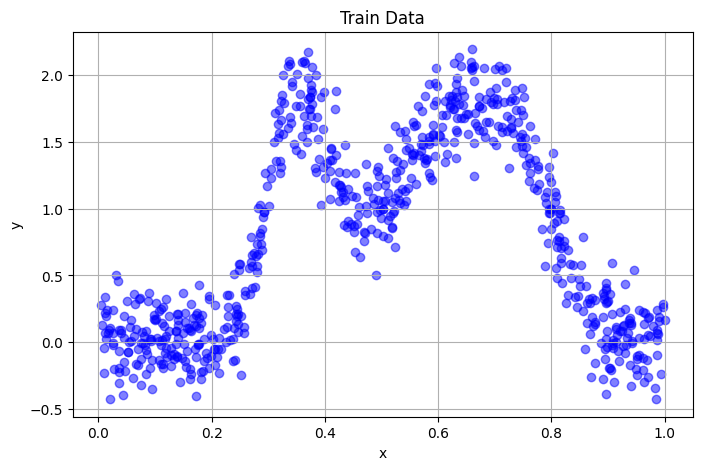

In [8]:
from sklearn.model_selection import train_test_split

# split data into train + temp (temp=val+test)
X_train, X_temp, y_train, y_temp = train_test_split(xdat, ydat, test_size=0.3, random_state=42)

# split temp into validation + test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# plot train data
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, color='blue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train Data')
plt.grid(True)
plt.show()

> Jouw antwoord hier

Ik heb de data opgedeeld in een train, test, val split. Ik ga de train data gebruiken om mijn model te fitten en de val set zou ik dan eventueel kunnen gebruiken om tussendoors te peilen hoe goed mijn model performt. De resultaten op de val set kan ik dan ook meenemen in eventuele technische overwegingen, misschien eventueel achterhalen door middel van mijn val split dat ik aan het overfitten ben. Ten slotte heb ik ook een test set, deze set is enkel om te testen hoe het model het doet op data die het model nog niet gezien heeft. Het verschil tussen de val set en de test set is dat ik wel technische keuzes kan baseren op de resultaten van de val set, maar niet op de resultaten van de test set. Dit doe ik om data leakage te voorkomen.

## Deel 3

Fit een zo simpel mogelijk model. Je zult hiervoor meerdere iteraties doorlopen, leg bij iedere iteratie uit
- welke keuzes je hebt gemaakt, en waarom?
- wat je opvalt aan het model en hoe je dit in een volgende iteratie aan gaat pakken.

Wees kort en bondig.

(Als je een 'dood spoor' in gaat, mag je deze iteraties wissen... we willen het proces zien hoe je bij je uiteindelijk model komt.)

### Iteratie 1: De Baseline Regressor
In deze iteratie ga ik op zoek naar de baseline regressor zodat ik een prestatiemaat heb voor mijn uiteindelijke model

In [6]:
# Codeblock 3a

baseline_value = y_train.mean() # get the average of y to get the baseline
baseline_value

np.float64(0.7929034998358968)

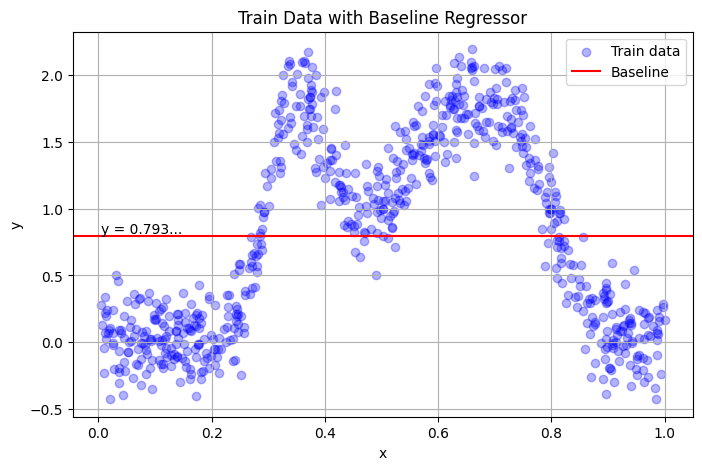

In [29]:
# Codeblock 3b

import matplotlib.pyplot as plt

# train data
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, color='blue', alpha=0.3, label='Train data')

# baseline regressor
plt.axhline(y=baseline_value, color='red', label='Baseline')
plt.text(x=X_train.min(), y=baseline_value + 0.02, s=f'y = {baseline_value:.3f}...')

# plot combined
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train Data with Baseline Regressor')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Codeblock 3c

from sklearn.metrics import mean_absolute_error

# Baseline predictions
y_baseline_val = np.full_like(y_val, baseline_value, dtype=float) # fill predictions with baseline number (0.793...) ignoring input features completely

# Compute metrics
mae = mean_absolute_error(y_val, y_baseline_val) # MAE because mae is better is there is noise

print("Baseline MAE:", mae)


Baseline MAE: 0.6833356547233858


### Iteratie 2 - Mijn model
In deze iteratie ga ik een zo goed mogelijke model maken

#### Technische Requirements
- non lineare activatiefunctie dus (sigmoid / tanh)
- 4 bends dus 4 neuronen
- MAE want veel ruis
#### Functionele Requirements
- Model fitten dat een zo laag mogelijke MAE behaalt op de data
- MAE score van minimaal <0.683...


In [8]:
X_train.shape # ik bekijk de vorm van de data aangezien de huidige vorm niet werkte met pytorch

(700, 1)

In [10]:
# Codeblock 3d

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Convert data to Tensors for PyTorch
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

# Model (Tanh model)
class FourNeuronNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 4)
        self.activation = nn.Tanh()
        self.output = nn.Linear(4, 1)

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.output(x)
        return x
model_tanh = FourNeuronNetwork()

# Training Parameters
criterion = nn.L1Loss() # (L1 is mae in pytorch) - MAE want veel ruis
optimizer = optim.Adam(model_tanh.parameters(), lr=0.01) 
# why this optimizer: 
epochs = 50000 # 50000 is too much i explain why below in my answer

# Trainin Loop
losses = []
for epoch in range(epochs):
    model_tanh.train()
    optimizer.zero_grad()
    outputs = model_tanh(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")


Epoch [100/50000], Loss: 0.573248
Epoch [200/50000], Loss: 0.525110
Epoch [300/50000], Loss: 0.456625
Epoch [400/50000], Loss: 0.307822
Epoch [500/50000], Loss: 0.296637
Epoch [600/50000], Loss: 0.295335
Epoch [700/50000], Loss: 0.294223
Epoch [800/50000], Loss: 0.293171
Epoch [900/50000], Loss: 0.292157
Epoch [1000/50000], Loss: 0.291238
Epoch [1100/50000], Loss: 0.290189
Epoch [1200/50000], Loss: 0.289207
Epoch [1300/50000], Loss: 0.288127
Epoch [1400/50000], Loss: 0.286936
Epoch [1500/50000], Loss: 0.285570
Epoch [1600/50000], Loss: 0.284176
Epoch [1700/50000], Loss: 0.282708
Epoch [1800/50000], Loss: 0.281432
Epoch [1900/50000], Loss: 0.279858
Epoch [2000/50000], Loss: 0.278277
Epoch [2100/50000], Loss: 0.276667
Epoch [2200/50000], Loss: 0.275081
Epoch [2300/50000], Loss: 0.273404
Epoch [2400/50000], Loss: 0.271502
Epoch [2500/50000], Loss: 0.269325
Epoch [2600/50000], Loss: 0.266391
Epoch [2700/50000], Loss: 0.262734
Epoch [2800/50000], Loss: 0.258260
Epoch [2900/50000], Loss: 0.2

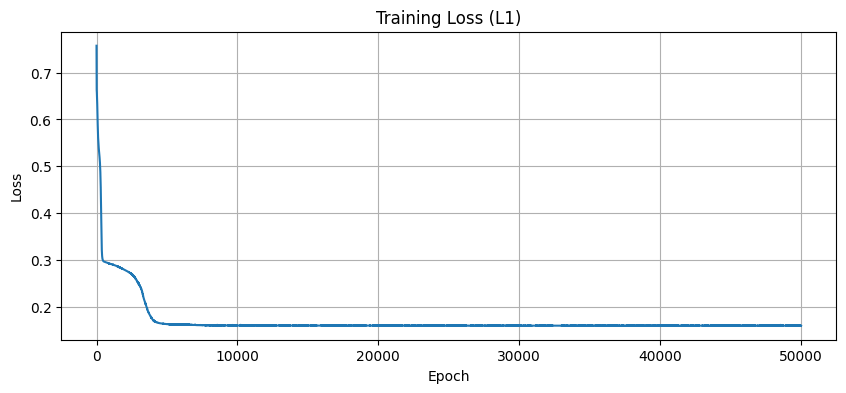

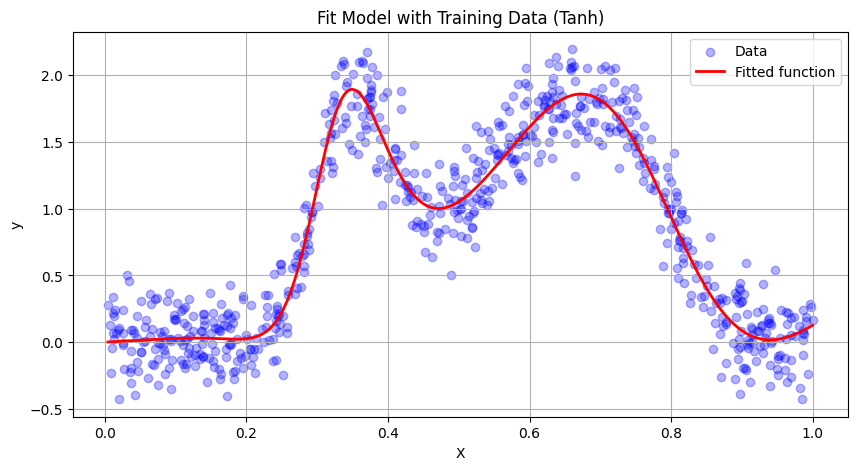

Train MAE: 0.158965


In [11]:
# Codeblock 3e

# Plot training loss
plt.figure(figsize=(10,4))
plt.plot(losses)
plt.title("Training Loss (L1)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


# Plotting Fit Model
model_tanh.eval()
with torch.no_grad():
    preds = model_tanh(X_train_t)
    train_mae = criterion(preds, y_train_t).item()

# Sort for clean plotting
sorted_idx = torch.argsort(X_train_t.squeeze())
X_sorted = X_train_t[sorted_idx]
y_sorted = y_train_t[sorted_idx]
preds_sorted = preds[sorted_idx]

plt.figure(figsize=(10,5))
plt.scatter(X_train_t.numpy(), y_train_t.numpy(), label="Data", color="blue", alpha=0.3)
plt.plot(X_sorted.numpy(), preds_sorted.numpy(), label="Fitted function", color="red", linewidth=2)
plt.title("Fit Model with Training Data (Tanh)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

print(f"Train MAE: {train_mae:.6f}")

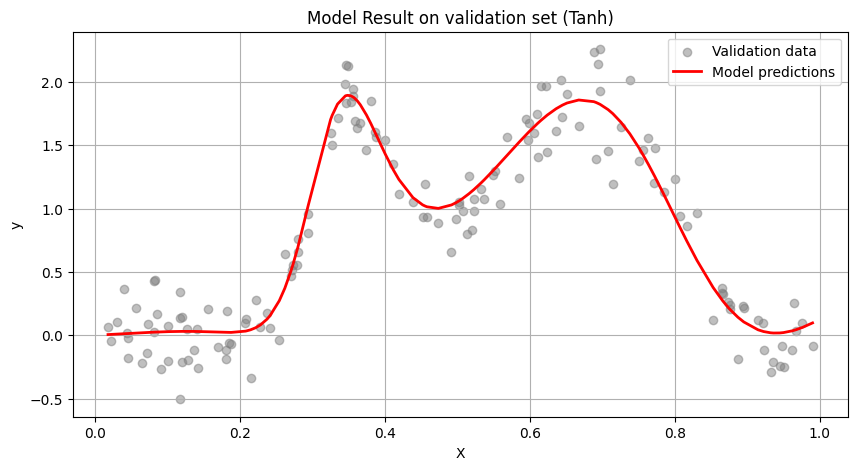

Validation MAE: 0.157131


In [12]:
# Codeblock 3f

import torch.nn as nn
import matplotlib.pyplot as plt

# make data tensors for preds
X_val_t = torch.tensor(X_val, dtype=torch.float32)
y_val_t = torch.tensor(y_val, dtype=torch.float32)

criterion = nn.L1Loss() 

model_tanh.eval() # zodat die niet verder traint
with torch.no_grad():
    val_preds = model_tanh(X_val_t)
    val_mae = criterion(val_preds, y_val_t).item()

# Sort for clean plotting
sorted_idx = torch.argsort(X_val_t.squeeze())
X_val_sorted = X_val_t[sorted_idx]
y_val_sorted = y_val_t[sorted_idx]
val_preds_sorted = val_preds[sorted_idx]


plt.figure(figsize=(10,5))
plt.scatter(X_val_t.numpy(), y_val_t.numpy(), label="Validation data", color="gray", alpha=0.5)
plt.plot(X_val_sorted.numpy(), val_preds_sorted.numpy(), label="Model predictions", color="red", linewidth=2)
plt.title("Model Result on validation set (Tanh)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()



print(f"Validation MAE: {val_mae:.6f}")



### Iteratie 3 - Sigmoid model
Nu wil ik kort alles nog snel herhalen met een nn met een sigmoid activatie functie om te kijken of dit betere resultaten geeft

Epoch [100/50000], Loss: 0.649055
Epoch [200/50000], Loss: 0.580753
Epoch [300/50000], Loss: 0.533794
Epoch [400/50000], Loss: 0.510989
Epoch [500/50000], Loss: 0.444408
Epoch [600/50000], Loss: 0.332828
Epoch [700/50000], Loss: 0.302801
Epoch [800/50000], Loss: 0.296348
Epoch [900/50000], Loss: 0.294877
Epoch [1000/50000], Loss: 0.293862
Epoch [1100/50000], Loss: 0.292873
Epoch [1200/50000], Loss: 0.291928
Epoch [1300/50000], Loss: 0.291001
Epoch [1400/50000], Loss: 0.290106
Epoch [1500/50000], Loss: 0.289242
Epoch [1600/50000], Loss: 0.288344
Epoch [1700/50000], Loss: 0.287498
Epoch [1800/50000], Loss: 0.286516
Epoch [1900/50000], Loss: 0.285480
Epoch [2000/50000], Loss: 0.284429
Epoch [2100/50000], Loss: 0.283428
Epoch [2200/50000], Loss: 0.282525
Epoch [2300/50000], Loss: 0.281756
Epoch [2400/50000], Loss: 0.281016
Epoch [2500/50000], Loss: 0.280173
Epoch [2600/50000], Loss: 0.279366
Epoch [2700/50000], Loss: 0.278518
Epoch [2800/50000], Loss: 0.277660
Epoch [2900/50000], Loss: 0.2

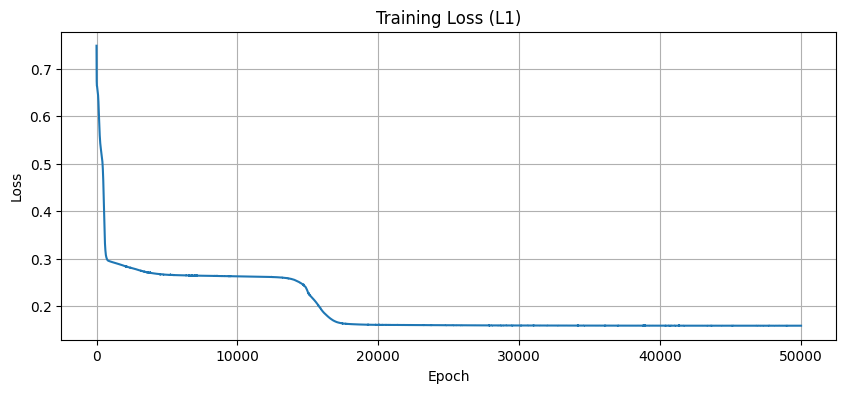

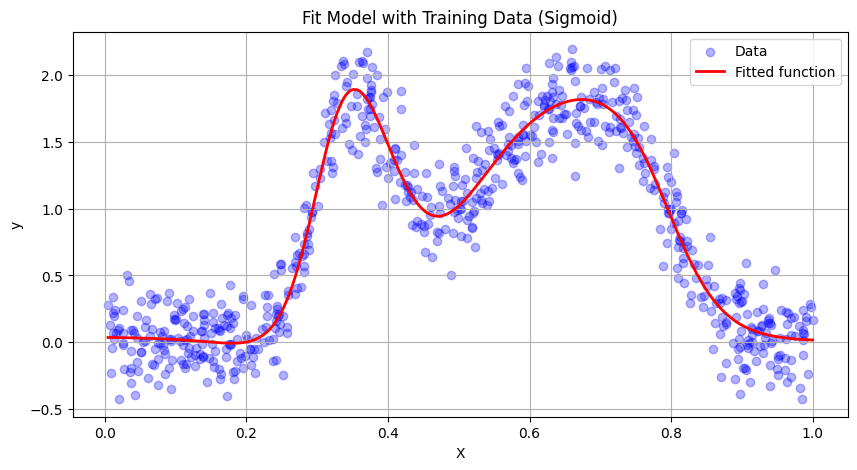

Train MAE: 0.158621


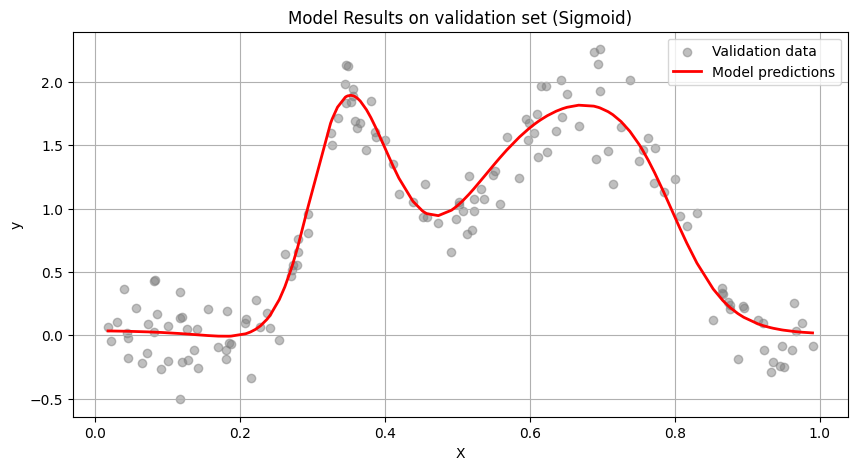

Validation MAE: 0.156341


In [ ]:
# Codeblock 3g


# Model Initialization and Training

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Convert data to Tensors for PyTorch
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

# Model
class SigmoidNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 4)
        self.activation = nn.Sigmoid()
        self.output = nn.Linear(4, 1)

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.output(x)
        return x
model_SNN = SigmoidNN()

# Training Parameters
criterion = nn.L1Loss() # (L1 is mae in pytorch) - MAE want veel ruis
optimizer = optim.Adam(model_SNN.parameters(), lr=0.01) # dont forget to elaborate lr
epochs = 50000 # 20000 is too much i explain why below in my answer

# Trainin Loop
losses = []
for epoch in range(epochs):
    model_SNN.train()
    optimizer.zero_grad()
    outputs = model_SNN(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")





# Plotting Loss and Training 

# Plot training loss
plt.figure(figsize=(10,4))
plt.plot(losses)
plt.title("Training Loss (L1)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


# Plotting Fit Model
model_SNN.eval()
with torch.no_grad():
    preds = model_SNN(X_train_t)
    train_mae = criterion(preds, y_train_t).item()

# Sort for clean plotting
sorted_idx = torch.argsort(X_train_t.squeeze())
X_sorted = X_train_t[sorted_idx]
y_sorted = y_train_t[sorted_idx]
preds_sorted = preds[sorted_idx]

plt.figure(figsize=(10,5))
plt.scatter(X_train_t.numpy(), y_train_t.numpy(), label="Data", color="blue", alpha=0.3)
plt.plot(X_sorted.numpy(), preds_sorted.numpy(), label="Fitted function", color="red", linewidth=2)
plt.title("Fit Model with Training Data (Sigmoid)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

print(f"Train MAE: {train_mae:.6f}")





# Validation Set

import torch.nn as nn
import matplotlib.pyplot as plt

# make data tensors for preds
X_val_t = torch.tensor(X_val, dtype=torch.float32)
y_val_t = torch.tensor(y_val, dtype=torch.float32)

criterion = nn.L1Loss() 

model_SNN.eval()
with torch.no_grad():
    val_preds = model_SNN(X_val_t)
    val_mae = criterion(val_preds, y_val_t).item()

# Sort for clean plotting
sorted_idx = torch.argsort(X_val_t.squeeze())
X_val_sorted = X_val_t[sorted_idx]
y_val_sorted = y_val_t[sorted_idx]
val_preds_sorted = val_preds[sorted_idx]


plt.figure(figsize=(10,5))
plt.scatter(X_val_t.numpy(), y_val_t.numpy(), label="Validation data", color="gray", alpha=0.5)
plt.plot(X_val_sorted.numpy(), val_preds_sorted.numpy(), label="Model predictions", color="red", linewidth=2)
plt.title("Model Results on validation set (Sigmoid)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()



print(f"Validation MAE: {val_mae:.6f}")





> Jouw antwoord hier

Ik heb een baseline regressor opgesteld door het gemiddelde y waarde uitterekenen (Codeblock 3a), door het gemiddelde y waarde uit te rekenen elimineren we alle input features (X waarden), waardoor we een baseline prediction kunnen opstellen. Deze baseline prediction heeft als waarde `0.79...`.

Vervolgens in Codeblock 3b laat ik in een plot zien hoe de baseline regressor eruit ziet ten opzichte van de data. Hiermee krijg ik een visuele validatie dat het reken sommetje dat ik heb uitgevoerd overeen komt met de werkelijkheid. En ik vond het zelf wel interessant om te zien.

In Codeblock 3c laat ik zien hoe goed de baseline regressor presteert aan de hand van de MAE metric. Ik heb voor MAE gekozen omdat de data ruis bevat, en als de data ruis bevat dan is MAE een betere keuze dan MSE, omdat MAE grote outliers met een korrel zout neemt terwijl MSE het zoveel mogelijk probeert mee te nemen in de lijnvorm. MAE geeft een reesultaat van `0.683...`, dit is de prestatiemaat voor mijn model die ik later in dit document ga fitten. Zo wordt mijn doel dus om een model te maken met een MAE van minstens `< 0.683...`.

In Codeblock 3d begin ik met het omzetten van de data van numpy arrays naar tensors. Dit moet omdat het (pytorch) neuraal netwerk de data in deze format verwacht. Vervolgens maak ik een simpel model zoals eerder besproken: 4 Neuronen, non-lineariteit (sigmoid of tanh), MAE want ruis. Ik heb gekozen voor de Adam optimizer omdat ik in het boek "Deep Learning with Python, Third Edition" hoofdstuk 4.1.3 gelezen heb dat Adam een goede default optimizer is voor elk probleem *"As for the choice of the optimizer, we’ll go with adam, which is usually a good default choice for virtually any problem"*. Ik zou niet weten hoe je verder optimizers kunt filteren ik heb papers geprobeerd te zoeken die optimizers benchmarken op non lineare regressie met ruis maar kon niets vinden op dat specifieke onderwerp. Ik heb een learning rate van 0.01 gekozen omdat dit ook over het algemeen een goede default choice is (Later in deel 7 ga ik dieper in op learning rates). ik heb gekozen voor 50000 epochs, dit is meer dan nodig was. als we kijken naar de plot van de Loss in Codeblock 3e, dan zien we dat na 10000 epochs het model niet meer veel veranderd is. Wellicht zou het makkelijker geweest zijn om early stopping te gebruiken.

Als we nog een keer kijken naar Codeblock 3e dan kunnen we ook zien dat de functie mooi over de train data heengaat met een MAE van `0.158...` Dat is een uitstekende verbetering ten opzichte van de baseline regressor die een MAE behaalde van `0.683...`. Om zeker te weten dat mijn model niet overfit is, predict ik ook de validatie set. het model haalt een MAE van `0.157...` op de validatie set. Omdat de MAE scores van de train set en validatie set erg dichtbij elkaar zitten kan ik concluderen dat het model niet overfit is.

In Codeblock 3g voer ik mijn derde en laatste iteratie uit, hier herhaal ik het hele proces dat ik hierboven heb beschreven maar dan met een sigmoid activatiefunctie. Ten eerste heb ik de epochs op 50000 gezet omdat het model nog aan het leren was tijdens 20000 epochs en soms nog tijdens 40000 epochs dus ben ik er flink boven gaan zitten. Nu is de training MAE `0.158...` en de validatie MAE `0.156...`. Toch zien we in deze run dat die na 20000 epochs amper veranderd is.

Beide activatiefuncties behalen in deze case dus beide bijna identieke resultaten.

### Bronnen
Deep Learning with Python, Third Edition. - https://lib.hva.nl/permalink/31UKB_UAM2_INST/1btjd75/alma9939771723505132


## Deel 4

Onderstaande code plot de voorspellingskromme van jouw model $\hat{f}$, in het ideale geval ziet je resultaat er uit zoals hieronder, of beter, met blauwe en gestippelde lijnen vrijwel boven elkaar.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step


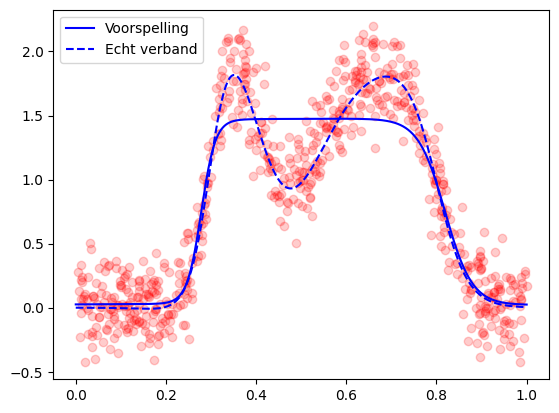

In [ ]:
# this looks like keras/tf code?
xpred = xplot
ypred = final_model.predict(xpred)

plt.plot(X_train, y_train, 'ro', alpha=0.2)
plt.plot(xpred, ypred, 'b-', label = 'Voorspelling')
plt.plot(xplot, yplot, 'b--', label = 'Echt verband')
plt.legend()
plt.show()

## Ik heb de data grijs gemaakt zodat de functies duidelijker te zien zijn
(Ik heb ook de plot een stuk groter gemaakt zodat de kleine verschillen tussen de functies wat duidelijker zijn)

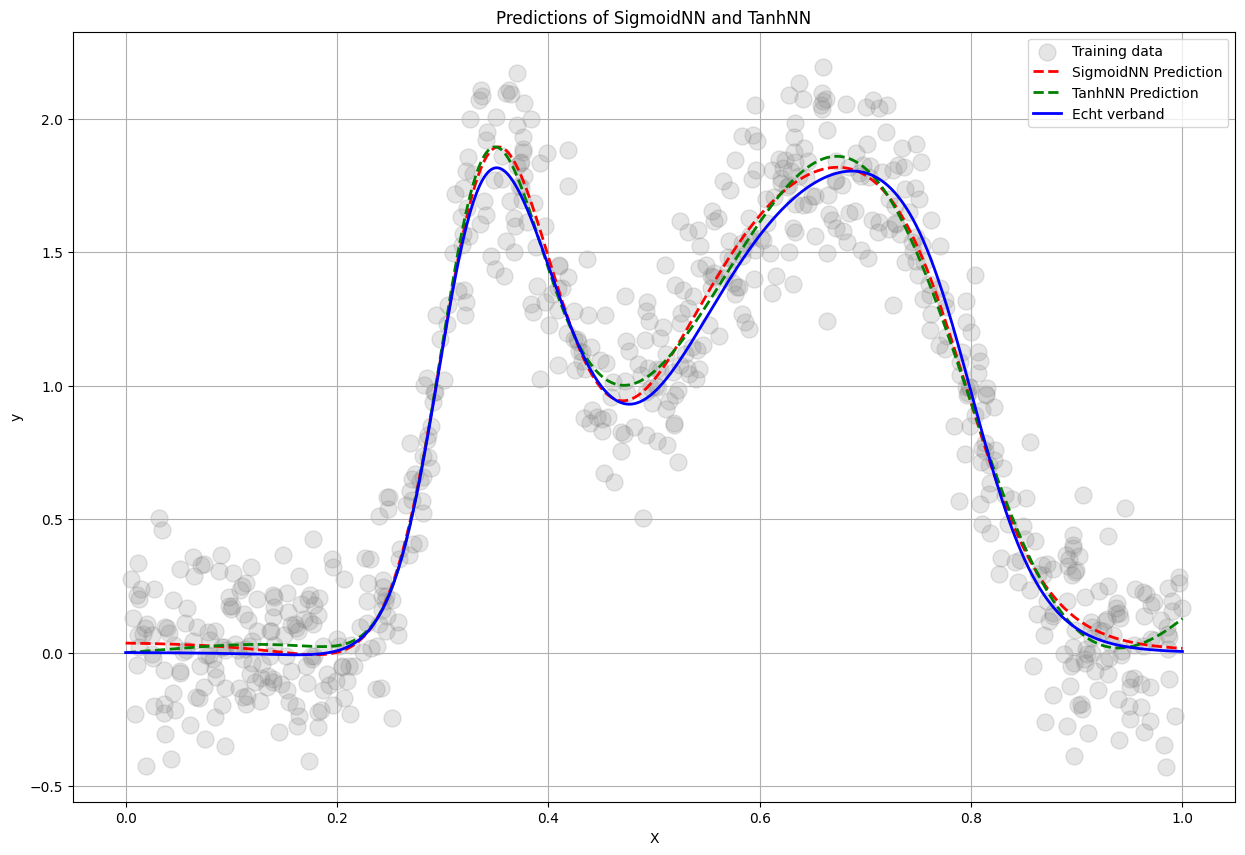

In [ ]:
# Codeblock 4a

# Prepare xplot tensor for both models
xpred_t = torch.tensor(xplot, dtype=torch.float32).unsqueeze(1)  # Make 2D

# Get predictions from SigmoidNN
model_SNN.eval()
with torch.no_grad():
    ypred_SNN = model_SNN(xpred_t).numpy()

# Get predictions from TanhNN
model_tanh.eval()
with torch.no_grad():
    ypred_tanh = model_tanh(xpred_t).numpy()

# Plot
plt.figure(figsize=(15,10))
plt.scatter(X_train, y_train, s=150, color='grey', alpha=0.2, label="Training data")
plt.plot(xplot, ypred_SNN, 'r--', label='SigmoidNN Prediction', linewidth=2)
plt.plot(xplot, ypred_tanh, 'g--', label='TanhNN Prediction', linewidth=2)
plt.plot(xplot, yplot, 'b-', label='Echt verband', linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Predictions of SigmoidNN and TanhNN")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# Codeblock 4b
len(X_train)

700

Voer deze code uit, wat valt je op? Zou je zeggen dat je de oorspronkelijke $f$ achterhaald hebt?

> Jouw antwoord hier

*BELANGRIJK: De functies die robert geplot heeft zijn geplot op de traininset (vermoedelijk met random_state=42 met een split van 0.7, 0.15, 0.15), NIET op de volledige set! Dit kan ik niet bewijzen met nummers omdat robert zijn code al uitgevoerd is, maar als ik mijn trainingset plot dan krijg ik de exact zelfde data scatter. Ik zou persoonlijk denken dat we op dit punt in de opdracht de volledige dataset zouden gebruiken. Om die reden ga ik ook alles plotten in dit Deel op de training set.

Ik denk niet dat ik de oorspronkelijke $f$ heb achterhaald omdat de lijnen niet exact over elkaar heen gaan. Als we de functie van links naar rechts bekijken vallen de volgende dingen me op. De originele lijn begint met een rechte lijn op y=0.0. beide functies missen dit eerste stukje en maken een vloeiende beweging. De stijging naar boven is extreem accuraat voor beide functies. Beide functie raken een bepaalde top die iets hoger ligt dan de originele functie. Vervolgens raakt de sigmoid functie ongeveer dezelfde dal en piek als de originele functie, maar de tanh functie ziet iets boven de dal en piek. alle 3 de functies gaan weer omlaag na deze piek en lijken elkaar te snijden op ongeveer y=0.65. ten slotte zien we iets interessants. de tanh functie repliceert de eind beweging van de echte functie, terwijl de simoid functie omhoog beweegt.

Alle onnauwkeurigheden zijn erg minimaal. Een deel van deze onnauwkeurigheden zijn hoogstwaarschijnlijk veroorzaakt door het feit dat mijn model op een portie van de data getrained is (70%), niet de volledige dataset. Dit kun je het beste zien bij de eerste piek, beide functie die ik getrained heb raken dezelfde piek ietsje boven de originele piek. Dit zou dus kunnen betekenen dat er iets meer data zit in de train set aan de bovenkant van de piek in vergelijk met de onderkant.

## Deel 5

Bestudeer de gewichten van je model, zou je zeggen dat je de oorspronkelijke $f$ achterhaald hebt?

Dit kunnen we controleren door even terug te blikken naar de gegeven functie: 
```py
# Verband tussen x en y
def f(x):
    return (+ 1.5*np.tanh(20*x - 6)  
            - 2.0*np.tanh(10*x - 4)
            + 1.5*np.tanh( 8*x - 4)
            - 1.0*np.tanh(15*x - 12))
            ```
We kunnen kijken naar de weights en biases van mijn modellen en kijken of dat de waarden overeen komen met de waarden van deze functie

In [ ]:
# Codeblock 5a

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ----------------------------
# Define the target function terms
# ----------------------------
target_terms = {
    "amplitude": np.array([1.5, -2.0, 1.5, -1.0]),
    "slope": np.array([20, 10, 8, 15]),
    "shift": np.array([6, 4, 4, 12])
}

# ----------------------------
# Extract model parameters
# ----------------------------
def extract_model_params(model):
    hidden_w = model.hidden.weight.data.numpy().flatten()       # slopes
    hidden_b = model.hidden.bias.data.numpy().flatten()         # shifts
    output_w = model.output.weight.data.numpy().flatten()       # amplitudes
    output_b = model.output.bias.data.numpy()[0]                # vertical bias
    return hidden_w, hidden_b, output_w, output_b

# SigmoidNN
hidden_w_snn, hidden_b_snn, output_w_snn, output_b_snn = extract_model_params(model_SNN)

# TanhNN
hidden_w_tanh, hidden_b_tanh, output_w_tanh, output_b_tanh = extract_model_params(model_tanh)

# ----------------------------
# Create a comparison table
# ----------------------------
labels = [f"Neuron {i+1}" for i in range(len(hidden_w_snn))]

df = pd.DataFrame({
    "Neuron": labels,
    "Target Amplitude": target_terms["amplitude"],
    "Target Slope": target_terms["slope"],
    "Target Shift": target_terms["shift"],
    "SigmoidNN Output Weight": output_w_snn,
    "SigmoidNN Hidden Weight": hidden_w_snn,
    "SigmoidNN Hidden Bias": hidden_b_snn,
    "TanhNN Output Weight": output_w_tanh,
    "TanhNN Hidden Weight": hidden_w_tanh,
    "TanhNN Hidden Bias": hidden_b_tanh
})

print("\nComparison Table: Target function vs Neural Networks\n")
print(df)




Comparison Table: Target function vs Neural Networks

     Neuron  Target Amplitude  Target Slope  Target Shift  \
0  Neuron 1               1.5            20             6   
1  Neuron 2              -2.0            10             4   
2  Neuron 3               1.5             8             4   
3  Neuron 4              -1.0            15            12   

   SigmoidNN Output Weight  SigmoidNN Hidden Weight  SigmoidNN Hidden Bias  \
0                -5.403648               -15.752878               7.311308   
1                 4.452395                33.915146             -10.370327   
2                -2.043195                25.956429             -20.627474   
3                 7.844184               -18.171904               7.088499   

   TanhNN Output Weight  TanhNN Hidden Weight  TanhNN Hidden Bias  
0             -3.815120            -16.290609            5.031875  
1             -4.695769              6.610865           -5.212319  
2              5.572460              3.54023

## But we can cheat and create a nn with the same weights biases and so fort.


Comparison Table: Target vs Old TanhNN vs Cheat TanhNN

     Neuron  Target Amplitude  Target Slope  Target Shift  \
0  Neuron 1          1.500000     20.000000      6.000000   
1  Neuron 2         -2.000000     10.000000      4.000000   
2  Neuron 3          1.500000      8.000000      4.000000   
3  Neuron 4         -1.000000     15.000000     12.000000   

   Old TanhNN Output Weight  Old TanhNN Hidden Weight  Old TanhNN Hidden Bias  \
0                 -3.815120                -16.290609                5.031875   
1                 -4.695769                  6.610865               -5.212319   
2                  5.572460                  3.540232               -2.660914   
3                  4.053839                -11.344308                3.813353   

   Cheat TanhNN Output Weight  Cheat TanhNN Hidden Weight  \
0                    1.500000                   20.000000   
1                   -2.000000                   10.000000   
2                    1.500000                   

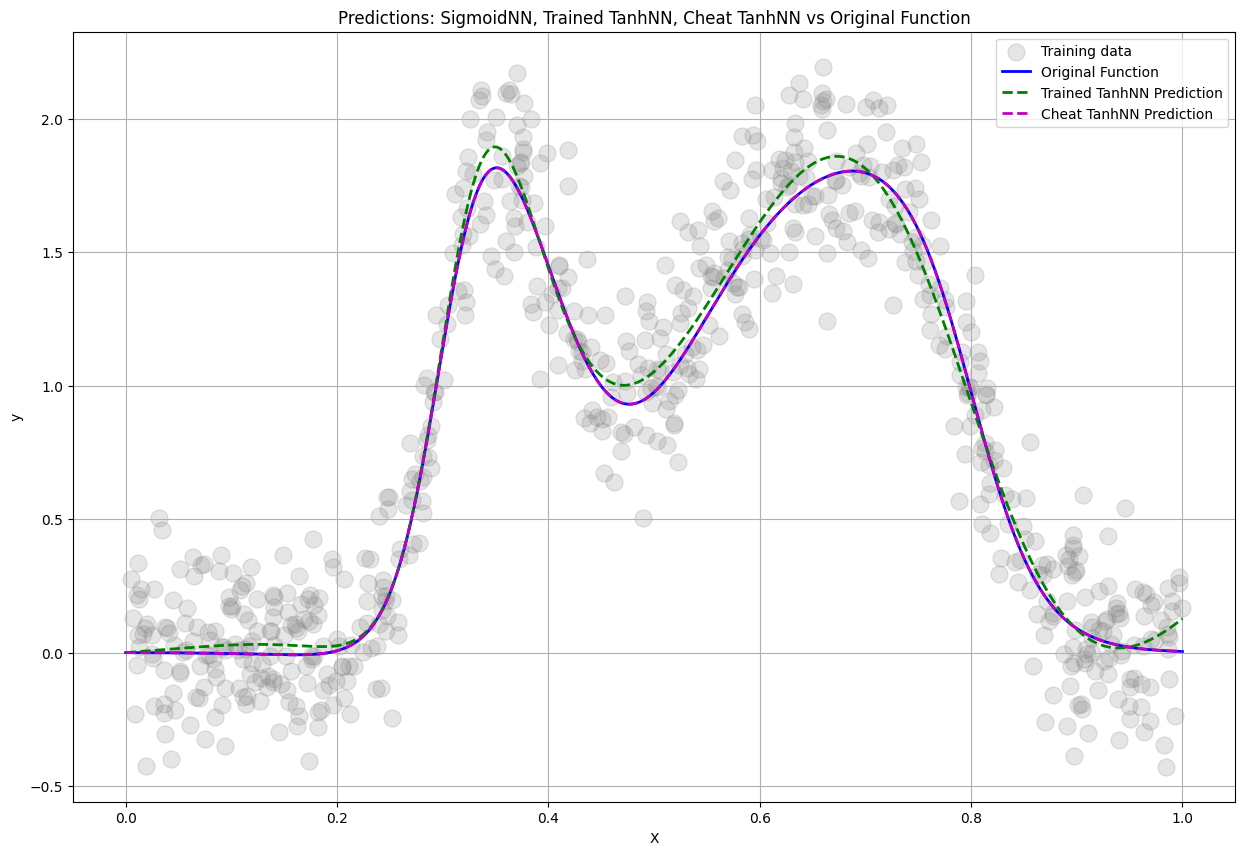

In [ ]:
# Codeblock 5b

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# Define TanhNN model
# -----------------------------
class TanhNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 4)
        self.activation = nn.Tanh()
        self.output = nn.Linear(4, 1)

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.output(x)
        return x

# -----------------------------
# Cheat TanhNN (manual weights)
# -----------------------------
model_tanh_cheat = TanhNN()

# Target function parameters
amplitude = torch.tensor([1.5, -2.0, 1.5, -1.0], dtype=torch.float32)  # output weights
slope     = torch.tensor([20.0, 10.0, 8.0, 15.0], dtype=torch.float32)  # hidden weights
shift     = torch.tensor([6.0, 4.0, 4.0, 12.0], dtype=torch.float32)    # horizontal shifts

# Correct hidden biases: b = -Shift
hidden_w_cheat = slope.view(4,1)
hidden_b_cheat = -shift
output_w_cheat = amplitude.view(1,4)

# Set the cheat model weights
with torch.no_grad():
    model_tanh_cheat.hidden.weight.data = hidden_w_cheat
    model_tanh_cheat.hidden.bias.data   = hidden_b_cheat
    model_tanh_cheat.output.weight.data = output_w_cheat
    model_tanh_cheat.output.bias.data = torch.tensor([0.0])

# -----------------------------
# Previously trained TanhNN weights (for comparison)
# -----------------------------
hidden_w_old = torch.tensor([-16.290609, 6.610865, 3.540232, -11.344308])
hidden_b_old = torch.tensor([5.031875, -5.212319, -2.660914, 3.813353])
output_w_old = torch.tensor([-3.815120, -4.695769, 5.572460, 4.053839])

# -----------------------------
# Build comparison table
# -----------------------------
labels = [f"Neuron {i+1}" for i in range(4)]

df_compare = pd.DataFrame({
    "Neuron": labels,
    "Target Amplitude": amplitude.numpy(),
    "Target Slope": slope.numpy(),
    "Target Shift": shift.numpy(),
    "Old TanhNN Output Weight": output_w_old.numpy().flatten(),
    "Old TanhNN Hidden Weight": hidden_w_old.numpy().flatten(),
    "Old TanhNN Hidden Bias": hidden_b_old.numpy().flatten(),
    "Cheat TanhNN Output Weight": output_w_cheat.numpy().flatten(),
    "Cheat TanhNN Hidden Weight": hidden_w_cheat.numpy().flatten(),
    "Cheat TanhNN Hidden Bias": hidden_b_cheat.numpy().flatten()
})


pd.set_option('display.float_format', '{:.6f}'.format)
print("\nComparison Table: Target vs Old TanhNN vs Cheat TanhNN\n")
print(df_compare)

# -----------------------------
# Plot predictions
# -----------------------------
# Prepare xplot tensor
xpred_t = torch.tensor(xplot, dtype=torch.float32).unsqueeze(1)  # 2D

model_tanh.eval()
with torch.no_grad():
    ypred_tanh = model_tanh(xpred_t).numpy()

model_tanh_cheat.eval()
with torch.no_grad():
    ypred_cheat = model_tanh_cheat(xpred_t).numpy()

# Original function
f_x = 1.5*np.tanh(20*xplot - 6) - 2.0*np.tanh(10*xplot - 4) + \
      1.5*np.tanh(8*xplot - 4) - 1.0*np.tanh(15*xplot - 12)

# Plot all
plt.figure(figsize=(15,10))
plt.scatter(X_train, y_train, s=150, color='grey', alpha=0.2, label="Training data")
plt.plot(xplot, f_x, 'b-', label='Original Function', linewidth=2)
plt.plot(xplot, ypred_tanh, 'g--', label='Trained TanhNN Prediction', linewidth=2)
plt.plot(xplot, ypred_cheat, 'm--', label='Cheat TanhNN Prediction', linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Predictions: SigmoidNN, Trained TanhNN, Cheat TanhNN vs Original Function")
plt.legend()
plt.grid(True)
plt.show()


> Jouw antwoord hier

*het valt me op dat Robert alleen vraagt naar de weights maar niet naar de biases terwijl die ook een rol spelen in de vorm van de functie.

Nou, komen de weights overeen? In Codeblock 5a, als we kijken naar de weights van mijn modellen in vergelijking met de target weights (target slope) dan zien we dat de getallen niet exact overeen komen met de originele functie. We zien ook dat alle andere waarden niet overeen komen, daarom kunnen we zeggen dat de weights NIET overeen komen.

In codeblock 5b bewijs ik mijn theorie aan de hand van een "Cheat" model. Ik heb als grap een nn gemaakt met tanh activatiefunctie, maar dit keer heb ik de weights en biasses hetzeflde gemaakt als de functie die gegeven was door robert, om te zien of de functie dan wel exact overeenkomt. Als we kijken naar de plot in Codeblock 5b dan zien we dat dit Cheat model exact overeenkomt, en dit valideert mijn hyopthese dat als alle weights en biases hetzelfde zijn de functies exact overeenkomen (behalve de shift die moet in min staan, ik weet niet prc waarom maar dat valt buiten het punt dat ik probeer te maken)



## Deel 6

Evalueer je model met een geschikte kwaliteitsmaat. Wat valt je op?

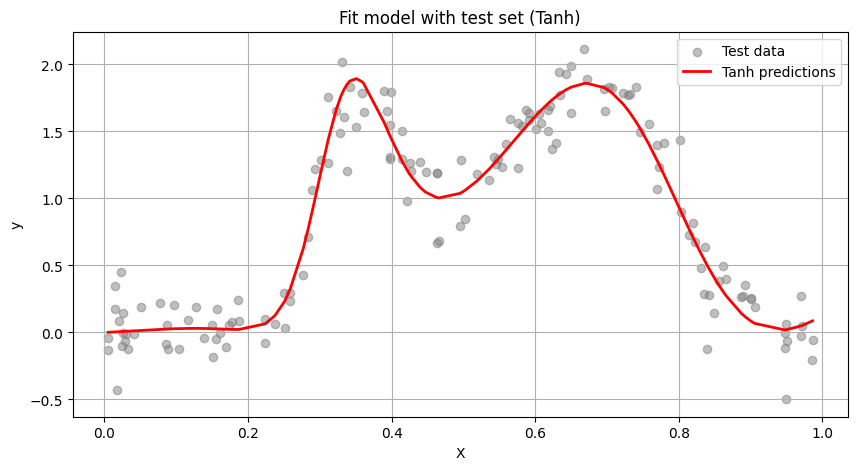

Test MAE: 0.147425 (Tanh)


In [18]:
# Tanh Function on Test Set

import torch.nn as nn
import matplotlib.pyplot as plt

# Make data tensors for test predictions
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

criterion = nn.L1Loss() 

model_tanh.eval()
with torch.no_grad():
    test_preds_tanh = model_tanh(X_test_t)
    test_mae_tanh = criterion(test_preds_tanh, y_test_t).item()

# Sort for clean plotting
sorted_idx = torch.argsort(X_test_t.squeeze())
X_test_sorted = X_test_t[sorted_idx]
y_test_sorted = y_test_t[sorted_idx]
test_preds_sorted_tanh = test_preds_tanh[sorted_idx]

# Plot
plt.figure(figsize=(10,5))
plt.scatter(X_test_t.numpy(), y_test_t.numpy(), label="Test data", color="gray", alpha=0.5)
plt.plot(X_test_sorted.numpy(), test_preds_sorted_tanh.numpy(), label="Tanh predictions", color="red", linewidth=2)
plt.title("Fit model with test set (Tanh)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

print(f"Test MAE: {test_mae_tanh:.6f} (Tanh)")


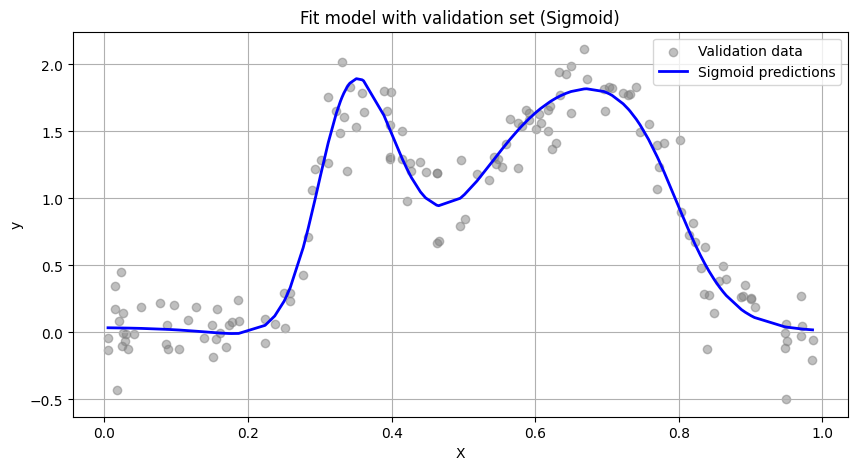

Test MAE: 0.146168 (Sigmoid)


In [19]:
# Sigmoid

model_SNN.eval()
with torch.no_grad():
    test_preds = model_SNN(X_test_t)
    test_mae_snn = criterion(test_preds, y_test_t).item()

# Sort for clean plotting
sorted_idx = torch.argsort(X_test_t.squeeze())
X_test_sorted = X_test_t[sorted_idx]
y_test_sorted = y_test_t[sorted_idx]
test_preds_sorted = test_preds[sorted_idx]


plt.figure(figsize=(10,5))
plt.scatter(X_test_t.numpy(), y_test_t.numpy(), label="Validation data", color="gray", alpha=0.5)
plt.plot(X_test_sorted.numpy(), test_preds_sorted.numpy(), label="Sigmoid predictions", color="blue", linewidth=2)
plt.title("Fit model with validation set (Sigmoid)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()



print(f"Test MAE: {test_mae_snn:.6f} (Sigmoid)")

> Jouw antwoord hier

In Deel3 Codeblock 3a en 3b heb ik een baseline regressor opgesteld. Deze baseline regressor behaalde een MAE score van `0.683...` een geschikte kwaliteits maat zou zijn om een lagere MAE score te behalen dan de baseline regressor, en dat doen we! In mijn anwtoord in Deel3 geef ik aan dat mijn sigmoid model een MAE score behaald van `0.156...` en mijn tanh model een MAE score behaald van `0.157...` op de validatie set. 

Nu ik klaar ben met al het trainen kan ik het model nog testen op de test set. Beide modellen resultaten die erg dicht op elkaar zitten. Het sigmoid model scoort een fractie beter op een 3de decimaal met een MAE score van `0.146...` en het tanh model scoort `0.147...` als we deze scores gaan vergelijken met de kwaliteits maat van `<0.683...` dan kunnen we zeggen dat we zijn geslaagd. 

# 7. Extra Deel
ik had de hele opdracht al eerder ingeleverd maar mijn beredenering voor mijn learning rate was erg zwak. Met die reden ben ik terug naar de opdracht gekomen om toch een referentie te gebruiken voor mijn learning rate. De reden dat ik dit in een extra deel doe, is: als ik nu terug naar deel 3 ga, daar de beste learning rate ga zoeken en er komt een andere learning rate uit, dan alles opnieuw moet runnen met die learning rate, dan komen er overal weer net andere getallen uit en dan moet ik weer al mijn antwoorden veranderen. En ik heb dat al meerdere malen gedaan helaas :(

## 7.1 Op zoek naar de beste learning rate
om de beste learning rate te vinden ga ik meerdere learning rates uitproberen totdat ik een learning rate vind waarbij de loss het snelst en stijlst daalt vergeleken met de andere learning rates. Deze techniek heb ik geplukt uit een youtube video hierbij de link: https://youtu.be/SaKOZ64Qnvo

Voor dit voorbeeld gaan we de sigmoid model gebruiken die ik eerder heb gedefinieerd.

In [ ]:
import torch.nn as nn
import matplotlib.pyplot as plt
    
class SNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 4)
        self.activation = nn.Tanh()
        self.output = nn.Linear(4, 1)

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.output(x)
        return x

In [ ]:
# Learning Rate = 1

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Convert data to Tensors for PyTorch
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

model = SNN()

# Training Parameters
criterion = nn.L1Loss() # (L1 is mae in pytorch) - MAE want veel ruis
optimizer = optim.Adam(model.parameters(), lr=1) 
epochs = 50000

# Trainin Loop
losses_1 = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()

    losses_1.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")
model_lr1 = model

Epoch [100/50000], Loss: 0.500693
Epoch [200/50000], Loss: 0.439140
Epoch [300/50000], Loss: 0.437013
Epoch [400/50000], Loss: 0.472877
Epoch [500/50000], Loss: 0.466378
Epoch [600/50000], Loss: 0.450992
Epoch [700/50000], Loss: 0.446147
Epoch [800/50000], Loss: 0.448265
Epoch [900/50000], Loss: 0.433099
Epoch [1000/50000], Loss: 0.476170
Epoch [1100/50000], Loss: 0.437786
Epoch [1200/50000], Loss: 0.441600
Epoch [1300/50000], Loss: 0.430545
Epoch [1400/50000], Loss: 0.454617
Epoch [1500/50000], Loss: 0.430264
Epoch [1600/50000], Loss: 0.443001
Epoch [1700/50000], Loss: 0.431739
Epoch [1800/50000], Loss: 0.435130
Epoch [1900/50000], Loss: 0.438611
Epoch [2000/50000], Loss: 0.431139
Epoch [2100/50000], Loss: 0.436647
Epoch [2200/50000], Loss: 0.456511
Epoch [2300/50000], Loss: 0.457084
Epoch [2400/50000], Loss: 0.469547
Epoch [2500/50000], Loss: 0.454292
Epoch [2600/50000], Loss: 0.443152
Epoch [2700/50000], Loss: 0.444520
Epoch [2800/50000], Loss: 0.467025
Epoch [2900/50000], Loss: 0.4

In [ ]:
# Learning Rate = 0.1

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Convert data to Tensors for PyTorch
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
model = SNN()


# Training Parameters
criterion = nn.L1Loss() # (L1 is mae in pytorch) - MAE want veel ruis
optimizer = optim.Adam(model.parameters(), lr=0.1) 
epochs = 50000

# Trainin Loop
losses_01 = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()

    losses_01.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")
model_lr01 = model

Epoch [100/50000], Loss: 0.330004
Epoch [200/50000], Loss: 0.306260
Epoch [300/50000], Loss: 0.294438
Epoch [400/50000], Loss: 0.291025
Epoch [500/50000], Loss: 0.288470
Epoch [600/50000], Loss: 0.285469
Epoch [700/50000], Loss: 0.284589
Epoch [800/50000], Loss: 0.284807
Epoch [900/50000], Loss: 0.279760
Epoch [1000/50000], Loss: 0.277899
Epoch [1100/50000], Loss: 0.279960
Epoch [1200/50000], Loss: 0.274372
Epoch [1300/50000], Loss: 0.268927
Epoch [1400/50000], Loss: 0.267323
Epoch [1500/50000], Loss: 0.265534
Epoch [1600/50000], Loss: 0.263875
Epoch [1700/50000], Loss: 0.262884
Epoch [1800/50000], Loss: 0.261098
Epoch [1900/50000], Loss: 0.263001
Epoch [2000/50000], Loss: 0.262589
Epoch [2100/50000], Loss: 0.257999
Epoch [2200/50000], Loss: 0.256628
Epoch [2300/50000], Loss: 0.259125
Epoch [2400/50000], Loss: 0.252917
Epoch [2500/50000], Loss: 0.249623
Epoch [2600/50000], Loss: 0.247377
Epoch [2700/50000], Loss: 0.247705
Epoch [2800/50000], Loss: 0.244338
Epoch [2900/50000], Loss: 0.2

In [ ]:
# Learning Rate = 0.01

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Convert data to Tensors for PyTorch
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
model = SNN()


# Training Parameters
criterion = nn.L1Loss() # (L1 is mae in pytorch) - MAE want veel ruis
optimizer = optim.Adam(model.parameters(), lr=0.01) 
epochs = 50000

# Trainin Loop
losses_001 = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()

    losses_001.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")
model_lr001 = model

Epoch [100/50000], Loss: 0.609543
Epoch [200/50000], Loss: 0.543791
Epoch [300/50000], Loss: 0.489895
Epoch [400/50000], Loss: 0.391858
Epoch [500/50000], Loss: 0.313067
Epoch [600/50000], Loss: 0.305456
Epoch [700/50000], Loss: 0.301276
Epoch [800/50000], Loss: 0.298250
Epoch [900/50000], Loss: 0.296333
Epoch [1000/50000], Loss: 0.295043
Epoch [1100/50000], Loss: 0.293964
Epoch [1200/50000], Loss: 0.292834
Epoch [1300/50000], Loss: 0.291631
Epoch [1400/50000], Loss: 0.290297
Epoch [1500/50000], Loss: 0.288783
Epoch [1600/50000], Loss: 0.287027
Epoch [1700/50000], Loss: 0.285028
Epoch [1800/50000], Loss: 0.282829
Epoch [1900/50000], Loss: 0.280443
Epoch [2000/50000], Loss: 0.278075
Epoch [2100/50000], Loss: 0.275765
Epoch [2200/50000], Loss: 0.273392
Epoch [2300/50000], Loss: 0.271117
Epoch [2400/50000], Loss: 0.268696
Epoch [2500/50000], Loss: 0.265932
Epoch [2600/50000], Loss: 0.262746
Epoch [2700/50000], Loss: 0.259221
Epoch [2800/50000], Loss: 0.255599
Epoch [2900/50000], Loss: 0.2

In [ ]:
# Learning Rate = 0.001

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Convert data to Tensors for PyTorch
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
model = SNN()


# Training Parameters
criterion = nn.L1Loss() # (L1 is mae in pytorch) - MAE want veel ruis
optimizer = optim.Adam(model.parameters(), lr=0.001) 
epochs = 50000

# Trainin Loop
losses_0001 = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()

    losses_0001.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")
model_lr0001 = model

Epoch [100/50000], Loss: 1.008558
Epoch [200/50000], Loss: 0.785781
Epoch [300/50000], Loss: 0.704314
Epoch [400/50000], Loss: 0.676386
Epoch [500/50000], Loss: 0.660267
Epoch [600/50000], Loss: 0.651244
Epoch [700/50000], Loss: 0.646872
Epoch [800/50000], Loss: 0.643046
Epoch [900/50000], Loss: 0.639333
Epoch [1000/50000], Loss: 0.635233
Epoch [1100/50000], Loss: 0.630401
Epoch [1200/50000], Loss: 0.625263
Epoch [1300/50000], Loss: 0.619869
Epoch [1400/50000], Loss: 0.613864
Epoch [1500/50000], Loss: 0.607147
Epoch [1600/50000], Loss: 0.600446
Epoch [1700/50000], Loss: 0.594900
Epoch [1800/50000], Loss: 0.590347
Epoch [1900/50000], Loss: 0.586272
Epoch [2000/50000], Loss: 0.582329
Epoch [2100/50000], Loss: 0.578841
Epoch [2200/50000], Loss: 0.575341
Epoch [2300/50000], Loss: 0.571706
Epoch [2400/50000], Loss: 0.567793
Epoch [2500/50000], Loss: 0.563630
Epoch [2600/50000], Loss: 0.559465
Epoch [2700/50000], Loss: 0.555179
Epoch [2800/50000], Loss: 0.551105
Epoch [2900/50000], Loss: 0.5

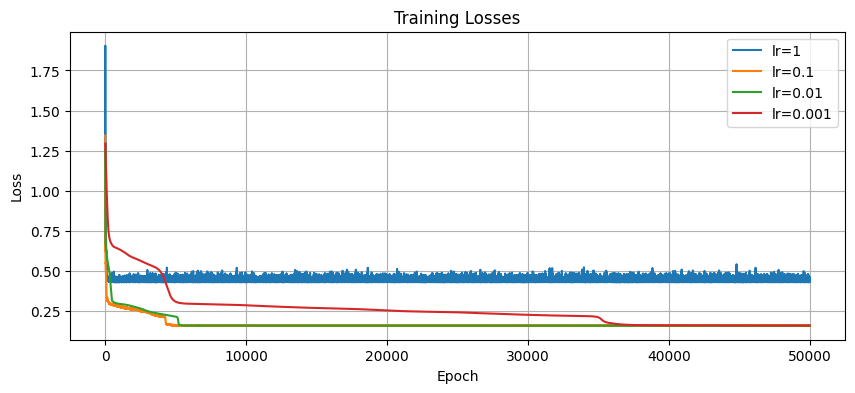

In [24]:
# Plot training losses for different learning rates
plt.figure(figsize=(10,4))
plt.plot(losses_1, label="lr=1")
plt.plot(losses_01, label="lr=0.1")
plt.plot(losses_001, label="lr=0.01")
plt.plot(losses_0001, label="lr=0.001")

plt.title("Training Losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()  # <-- Add legend here
plt.show()


### 7.2 Tussen-Conclusie
Uit de vormen van de grafieken van de losses kunnen we het volgende concluderen. `lr=1` daalt vrijwel onmiddelijk en blijft hangen bij een loss van iets onder 0.5. Elke andere lr haalt een lagere loss, wat betekent dat een learning rate van 1 te hoog is. De stappen die `lr=1` zijn vermoedelijk te hoog waardoor het niet een zo lage loss kan behalen als de andere learning rates. Kijken we naar `lr=0.1` en `lr=0.01` dan zien we 2 lijnen die vrijwel identiek zijn. `lr=0.1` leert iets sneller dan `lr=0.01` zoals verwacht, aangezien de stapjes die `lr=0.1` neeemt iets groter zijn dan de stapjes die `lr=0.01` neemt. `lr=0.01` neemt iets langer de tijd om te leren omdat het kortere stapjes neemt maar komt net als `lr=0.1` op dezelfde lage loss uit van ongeveer `0.159...`. Ten slotte heb ik ook een learning rate van 0.001 getest. Zoals je kunt zien in de grafiek, leert deze een stuk trager. Dit is ook zoals verwacht aangezien de stapjes die `lr=0.001` maakt nog kleiner zijn. Uiteindelijk na ongeveer 36000+ epochs komt deze learning rate ook uit op de lage loss van rond de `0.159...`.

De conclusie die we hieruit kunnen trekken is dat een learning rate van 1 te hoog is, en dat een learning rate van 0.001 te laag is. De perfecte learning rate voor dit probleem zal zitten tussen 0.1 en 0.01 of iets daarboven of onder.

We kunnen verder finetunen om te kijken welke learning rate het beste presteert. Ook ga ik de epochs verlagen naar 30000 omdat 50000 simpelweg overbodig is. (30000 is waarschijnlijk ook overbodig maar neem het zekere voor het onzekere)

In [30]:
# Learning Rate = 0.3

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Convert data to Tensors for PyTorch
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

model = SNN()

# Training Parameters
criterion = nn.L1Loss() # (L1 is mae in pytorch) - MAE want veel ruis
optimizer = optim.Adam(model.parameters(), lr=0.3) 
epochs = 30000

# Trainin Loop
losses_03 = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()

    losses_03.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")
model_l03 = model

Epoch [100/30000], Loss: 0.298727
Epoch [200/30000], Loss: 0.284705
Epoch [300/30000], Loss: 0.265825
Epoch [400/30000], Loss: 0.249567
Epoch [500/30000], Loss: 0.189631
Epoch [600/30000], Loss: 0.167739
Epoch [700/30000], Loss: 0.161716
Epoch [800/30000], Loss: 0.166252
Epoch [900/30000], Loss: 0.165006
Epoch [1000/30000], Loss: 0.163646
Epoch [1100/30000], Loss: 0.165554
Epoch [1200/30000], Loss: 0.164517
Epoch [1300/30000], Loss: 0.163794
Epoch [1400/30000], Loss: 0.167704
Epoch [1500/30000], Loss: 0.162964
Epoch [1600/30000], Loss: 0.163969
Epoch [1700/30000], Loss: 0.162472
Epoch [1800/30000], Loss: 0.162147
Epoch [1900/30000], Loss: 0.159902
Epoch [2000/30000], Loss: 0.160063
Epoch [2100/30000], Loss: 0.160451
Epoch [2200/30000], Loss: 0.160023
Epoch [2300/30000], Loss: 0.163851
Epoch [2400/30000], Loss: 0.163702
Epoch [2500/30000], Loss: 0.159790
Epoch [2600/30000], Loss: 0.162608
Epoch [2700/30000], Loss: 0.162108
Epoch [2800/30000], Loss: 0.161903
Epoch [2900/30000], Loss: 0.1

In [31]:
# Learning Rate = 0.1

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Convert data to Tensors for PyTorch
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

model = SNN()

# Training Parameters
criterion = nn.L1Loss() # (L1 is mae in pytorch) - MAE want veel ruis
optimizer = optim.Adam(model.parameters(), lr=0.1) 
epochs = 30000

# Trainin Loop
losses_01_2 = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()

    losses_01_2.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")
model_l01_2 = model

Epoch [100/30000], Loss: 0.311293
Epoch [200/30000], Loss: 0.293969
Epoch [300/30000], Loss: 0.290219
Epoch [400/30000], Loss: 0.283244
Epoch [500/30000], Loss: 0.279133
Epoch [600/30000], Loss: 0.271800
Epoch [700/30000], Loss: 0.265328
Epoch [800/30000], Loss: 0.261579
Epoch [900/30000], Loss: 0.259913
Epoch [1000/30000], Loss: 0.256325
Epoch [1100/30000], Loss: 0.255818
Epoch [1200/30000], Loss: 0.254016
Epoch [1300/30000], Loss: 0.252897
Epoch [1400/30000], Loss: 0.252371
Epoch [1500/30000], Loss: 0.251873
Epoch [1600/30000], Loss: 0.248567
Epoch [1700/30000], Loss: 0.241396
Epoch [1800/30000], Loss: 0.202758
Epoch [1900/30000], Loss: 0.182097
Epoch [2000/30000], Loss: 0.173852
Epoch [2100/30000], Loss: 0.183885
Epoch [2200/30000], Loss: 0.166218
Epoch [2300/30000], Loss: 0.165973
Epoch [2400/30000], Loss: 0.164131
Epoch [2500/30000], Loss: 0.162854
Epoch [2600/30000], Loss: 0.162490
Epoch [2700/30000], Loss: 0.162234
Epoch [2800/30000], Loss: 0.161321
Epoch [2900/30000], Loss: 0.1

In [32]:
# Learning Rate = 0.08

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Convert data to Tensors for PyTorch
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

model = SNN()

# Training Parameters
criterion = nn.L1Loss() # (L1 is mae in pytorch) - MAE want veel ruis
optimizer = optim.Adam(model.parameters(), lr=0.08) 
epochs = 30000

# Trainin Loop
losses_008 = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()

    losses_008.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")
model_l008 = model

Epoch [100/30000], Loss: 0.459950
Epoch [200/30000], Loss: 0.291422
Epoch [300/30000], Loss: 0.260502
Epoch [400/30000], Loss: 0.217916
Epoch [500/30000], Loss: 0.193947
Epoch [600/30000], Loss: 0.186920
Epoch [700/30000], Loss: 0.189278
Epoch [800/30000], Loss: 0.184101
Epoch [900/30000], Loss: 0.179760
Epoch [1000/30000], Loss: 0.179345
Epoch [1100/30000], Loss: 0.178839
Epoch [1200/30000], Loss: 0.177333
Epoch [1300/30000], Loss: 0.176598
Epoch [1400/30000], Loss: 0.176158
Epoch [1500/30000], Loss: 0.175664
Epoch [1600/30000], Loss: 0.175704
Epoch [1700/30000], Loss: 0.176722
Epoch [1800/30000], Loss: 0.174954
Epoch [1900/30000], Loss: 0.174619
Epoch [2000/30000], Loss: 0.174256
Epoch [2100/30000], Loss: 0.173667
Epoch [2200/30000], Loss: 0.176742
Epoch [2300/30000], Loss: 0.178446
Epoch [2400/30000], Loss: 0.173240
Epoch [2500/30000], Loss: 0.178024
Epoch [2600/30000], Loss: 0.173980
Epoch [2700/30000], Loss: 0.171891
Epoch [2800/30000], Loss: 0.171341
Epoch [2900/30000], Loss: 0.1

In [33]:
# Learning Rate = 0.03

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Convert data to Tensors for PyTorch
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

model = SNN()

# Training Parameters
criterion = nn.L1Loss() # (L1 is mae in pytorch) - MAE want veel ruis
optimizer = optim.Adam(model.parameters(), lr=0.03) 
epochs = 30000

# Trainin Loop
losses_003 = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()

    losses_003.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")
model_l003 = model

Epoch [100/30000], Loss: 0.482113
Epoch [200/30000], Loss: 0.305121
Epoch [300/30000], Loss: 0.294543
Epoch [400/30000], Loss: 0.290726
Epoch [500/30000], Loss: 0.284841
Epoch [600/30000], Loss: 0.270631
Epoch [700/30000], Loss: 0.242932
Epoch [800/30000], Loss: 0.214222
Epoch [900/30000], Loss: 0.196050
Epoch [1000/30000], Loss: 0.187661
Epoch [1100/30000], Loss: 0.181981
Epoch [1200/30000], Loss: 0.180395
Epoch [1300/30000], Loss: 0.179638
Epoch [1400/30000], Loss: 0.178865
Epoch [1500/30000], Loss: 0.178077
Epoch [1600/30000], Loss: 0.177935
Epoch [1700/30000], Loss: 0.177679
Epoch [1800/30000], Loss: 0.176732
Epoch [1900/30000], Loss: 0.176432
Epoch [2000/30000], Loss: 0.175850
Epoch [2100/30000], Loss: 0.175679
Epoch [2200/30000], Loss: 0.175040
Epoch [2300/30000], Loss: 0.174939
Epoch [2400/30000], Loss: 0.174821
Epoch [2500/30000], Loss: 0.174377
Epoch [2600/30000], Loss: 0.175228
Epoch [2700/30000], Loss: 0.173901
Epoch [2800/30000], Loss: 0.173717
Epoch [2900/30000], Loss: 0.1

In [34]:
# Learning Rate = 0.01

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Convert data to Tensors for PyTorch
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

model = SNN()

# Training Parameters
criterion = nn.L1Loss() # (L1 is mae in pytorch) - MAE want veel ruis
optimizer = optim.Adam(model.parameters(), lr=0.01) 
epochs = 30000

# Trainin Loop
losses_001_2 = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()

    losses_001_2.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")
model_l001_2 = model

Epoch [100/30000], Loss: 0.626805
Epoch [200/30000], Loss: 0.545826
Epoch [300/30000], Loss: 0.515656
Epoch [400/30000], Loss: 0.496197
Epoch [500/30000], Loss: 0.454438
Epoch [600/30000], Loss: 0.356306
Epoch [700/30000], Loss: 0.309777
Epoch [800/30000], Loss: 0.305254
Epoch [900/30000], Loss: 0.302205
Epoch [1000/30000], Loss: 0.299592
Epoch [1100/30000], Loss: 0.297170
Epoch [1200/30000], Loss: 0.295370
Epoch [1300/30000], Loss: 0.294117
Epoch [1400/30000], Loss: 0.293082
Epoch [1500/30000], Loss: 0.292154
Epoch [1600/30000], Loss: 0.291311
Epoch [1700/30000], Loss: 0.290469
Epoch [1800/30000], Loss: 0.289513
Epoch [1900/30000], Loss: 0.288496
Epoch [2000/30000], Loss: 0.287518
Epoch [2100/30000], Loss: 0.286479
Epoch [2200/30000], Loss: 0.285410
Epoch [2300/30000], Loss: 0.284220
Epoch [2400/30000], Loss: 0.282808
Epoch [2500/30000], Loss: 0.281463
Epoch [2600/30000], Loss: 0.280277
Epoch [2700/30000], Loss: 0.278890
Epoch [2800/30000], Loss: 0.277500
Epoch [2900/30000], Loss: 0.2

In [35]:
# Learning Rate = 0.008

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Convert data to Tensors for PyTorch
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

model = SNN()

# Training Parameters
criterion = nn.L1Loss() # (L1 is mae in pytorch) - MAE want veel ruis
optimizer = optim.Adam(model.parameters(), lr=0.008) 
epochs = 30000

# Trainin Loop
losses_0008 = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()

    losses_0008.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")
model_l0008 = model

Epoch [100/30000], Loss: 0.560932
Epoch [200/30000], Loss: 0.510988
Epoch [300/30000], Loss: 0.412092
Epoch [400/30000], Loss: 0.302698
Epoch [500/30000], Loss: 0.297591
Epoch [600/30000], Loss: 0.295690
Epoch [700/30000], Loss: 0.294295
Epoch [800/30000], Loss: 0.293129
Epoch [900/30000], Loss: 0.292086
Epoch [1000/30000], Loss: 0.291021
Epoch [1100/30000], Loss: 0.289857
Epoch [1200/30000], Loss: 0.288644
Epoch [1300/30000], Loss: 0.287596
Epoch [1400/30000], Loss: 0.286462
Epoch [1500/30000], Loss: 0.285316
Epoch [1600/30000], Loss: 0.283975
Epoch [1700/30000], Loss: 0.282734
Epoch [1800/30000], Loss: 0.281336
Epoch [1900/30000], Loss: 0.280262
Epoch [2000/30000], Loss: 0.278982
Epoch [2100/30000], Loss: 0.277705
Epoch [2200/30000], Loss: 0.276408
Epoch [2300/30000], Loss: 0.275165
Epoch [2400/30000], Loss: 0.274082
Epoch [2500/30000], Loss: 0.273036
Epoch [2600/30000], Loss: 0.272188
Epoch [2700/30000], Loss: 0.271204
Epoch [2800/30000], Loss: 0.270576
Epoch [2900/30000], Loss: 0.2

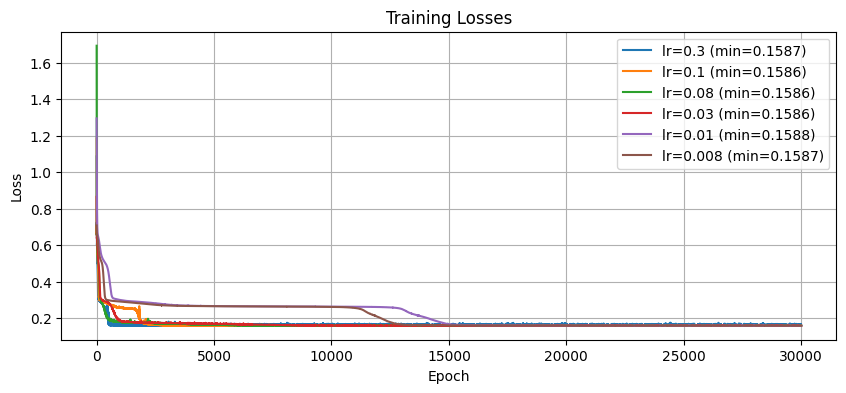

In [38]:
# Plot training losses for different learning rates
plt.figure(figsize=(10,4))
plt.plot(losses_03, label=f"lr=0.3 (min={min(losses_03):.4f})")
plt.plot(losses_01_2, label=f"lr=0.1 (min={min(losses_01_2):.4f})")
plt.plot(losses_008, label=f"lr=0.08 (min={min(losses_008):.4f})")
plt.plot(losses_003, label=f"lr=0.03 (min={min(losses_003):.4f})")
plt.plot(losses_001_2, label=f"lr=0.01 (min={min(losses_001_2):.4f})")
plt.plot(losses_0008, label=f"lr=0.008 (min={min(losses_0008):.4f})")

plt.title("Training Losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()


## 7.3 Tussen-Conclusie 2
We zien nu 6 lijnen met learning rates tussen 0.3 en 0.008. Uit deze plot kunnen we concluderen dat een learning rate van 0.008 en 0.01 te laag zijn aangezien die erg laat de loss van `0.158...` halen, terwijl andere learning rate waarden dat veel sneller doen. Het is verassend dat learning rates van 0.08 en 0.3 sneller de `0.158...` halen dan een learning rate van 0.1. Dit kan ik niet precies verklaren buiten het feit dat ik denk dat het model een beetje ongeluk had met de stappen? Anyway, we kunnen nu zeggen dat de beste learning rate ergens zit tussen 0.3 en 0.03, of er een beetje boven of een beetje onder.

Nu zou je eindeloos door kunnen gaan met dit proces en steeds waarden nemen die een beetje afzitten van de waarden die eerder getest zijn, maar je kunt jezelf ook afvragen hoe nuttig het nou is omdat we telkens toch op de zeflde bodem waarde uitkomen en ongeveer even snel.

Toch houd mijn niewsgierigheid me tegen om nu te stoppen dus gaan we door met maar 10000 epochs. Puur om te kijken wat in deze casus de beste learning rate zou zijn.

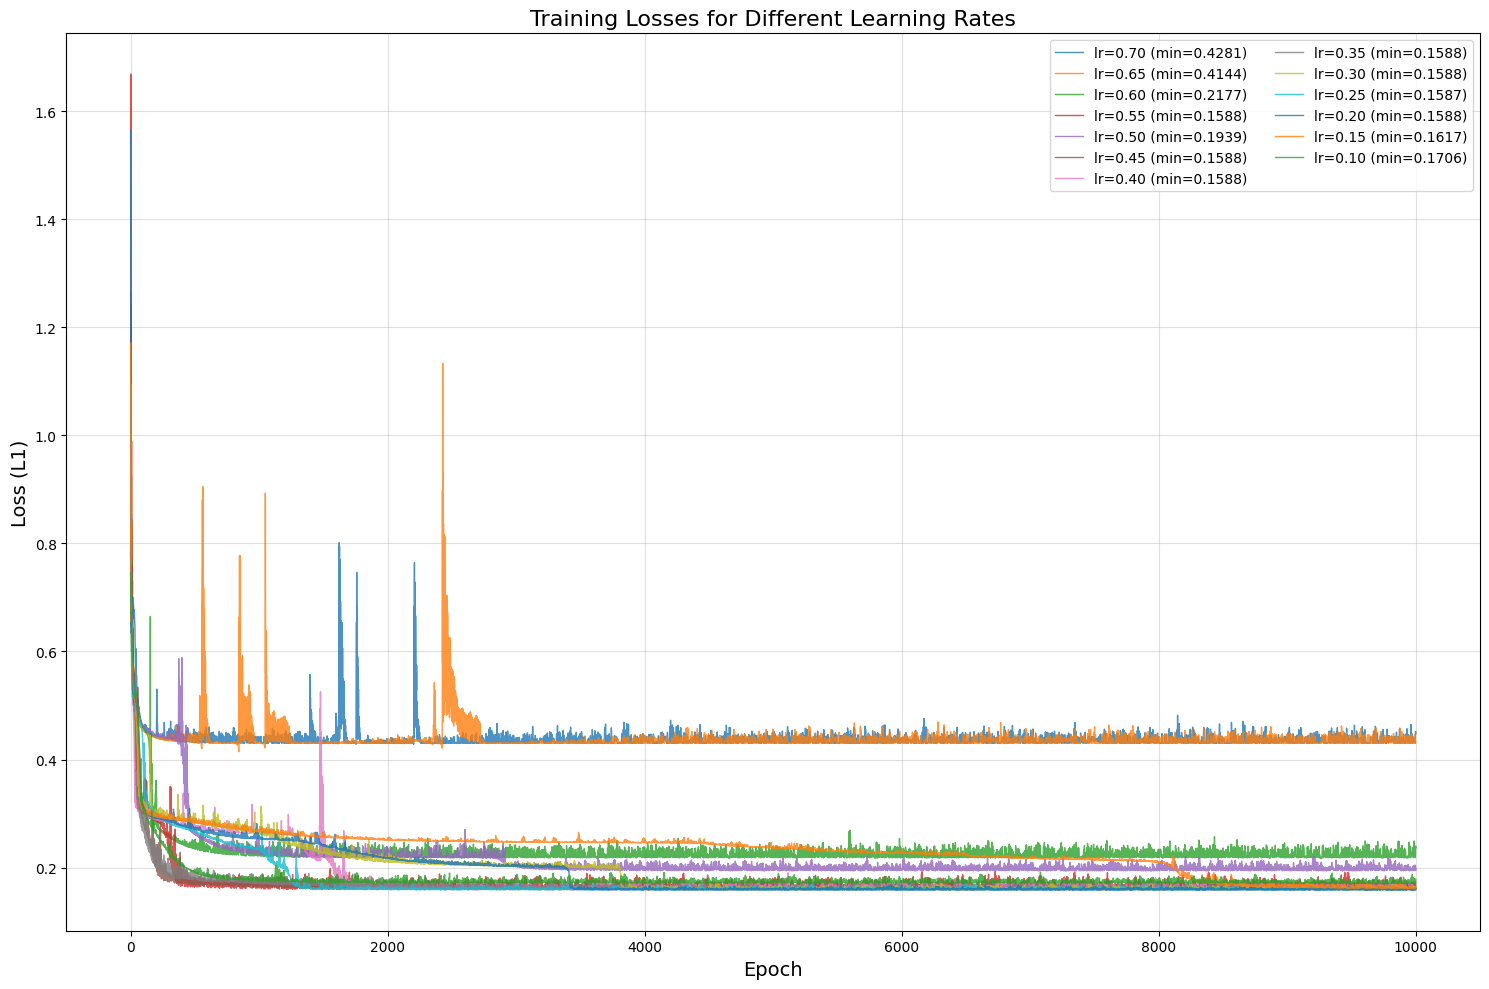

In [48]:
# even wat slimmere code zodat ik het niet steeds allemaal handmatig hoef te doen 
# # we testen nu vanaf 0.7 en dan steeds -0.05 dus [0.7, 0.65, 0.6, 0.55] etc

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# --- Data setup ---
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

# --- Hyperparameters ---
criterion = nn.L1Loss()
epochs = 10000
learning_rates = [round(lr, 2) for lr in torch.arange(0.7, 0.05, -0.05).tolist()] 

# --- Store results ---
all_losses = {}

# --- Training loop over learning rates ---
for lr in learning_rates:
    model = SNN()  # new model each time
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_t)
        loss = criterion(outputs, y_train_t)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    all_losses[lr] = losses

# --- Plot all learning rate curves ---
plt.figure(figsize=(15, 10))  # make plot larger

for lr, losses in all_losses.items():
    plt.plot(losses, label=f"lr={lr:.2f} (min={min(losses):.4f})", 
             linewidth=1.0, alpha=0.8)  # thinner & slightly transparent lines

plt.title("Training Losses for Different Learning Rates", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss (L1)", fontsize=14)
plt.legend(fontsize=10, loc="upper right", ncol=2)  # smaller legend with 2 columns
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()


## 7.4 Conclusie
Dit is toch fantastisch. We zien duidelijk dat learning rates van 0.7 en 0.65 te hoog zijn aangezien zij blijven hangen bij een loss van `0.41.../0.42...`. learning rates van 0.60 en 0.50 zijn of te hoog of hebben meer epochs nodig, aangezien ze erg dichtbij de ondergrens zitten van `0.15x...`. Dan heb je ook nog 0.55 die het dan weer wel leert wat ik dus weer niet kan verklaren voel je vrij hierover een opmerking te plaatsen, ben zelf best benieuwd. Dan komen we in de golden range van 0.45 - 0.20, hier tussen leren de modellen het snelst en best (best als in lagere loss), vergeleken met de modellen die een hogere of lagere learning rate hebben. Vanaf 0.15 wordt de learning rate weer te laag en zijn er meer epochs nodig omdat zij te langzaam leren en te korte stappen nemen.

Eindconclusie, de ideale learning rate zit volgens mijn testen tussen 0.45 en 0.20. dit verklaart waarom mijn modellen het pas goed deden met heel veel epochs, omdat ik een learning rate van 0.01 gebruikte. En we zien hier dat een model vanaf `lr=0.15` en lager al meer dan 10000 epochs nodig heeft, laat staan een learning rate van `lr=0.01`.